In [1]:
!pip install matplotlib==3.7.3
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

**1)Import required libraries and read the dataset.**

In [3]:
df=pd.read_csv('honeyproduction.csv')
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


**2) Check the first few samples, shape, info of the data and try to familiarize yourself with different features.**

In [4]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
df.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [6]:
df.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
401,MN,130000.0,68,8840000.0,2564000.0,1.04,9194000.0,2007
566,MT,145000.0,92,13340000.0,3202000.0,1.70,22678000.0,2011
143,LA,45000.0,106,4770000.0,572000.0,0.60,2862000.0,2001
468,AR,24000.0,57,1368000.0,301000.0,1.42,1943000.0,2009
178,FL,220000.0,93,20460000.0,2026000.0,1.14,23324000.0,2002


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


**Observation**:There is only one columns which is of dtype object i.e 'State' and all the other columns are of numeric datatype.

In [8]:
df.shape

(626, 8)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
numcol,626.0,6.028435e+04,9.107709e+04,2000.00,9000.0000,26000.00,63750.00,510000.00
yieldpercol,626.0,6.200958e+01,1.945875e+01,19.00,48.0000,60.00,74.00,136.00
totalprod,626.0,4.169086e+06,6.883847e+06,84000.00,475000.0000,1533000.00,4175250.00,46410000.00
stocks,626.0,1.318859e+06,2.272964e+06,8000.00,143000.0000,439500.00,1489500.00,13800000.00
priceperlb,626.0,1.409569e+00,6.385989e-01,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,4.715741e+06,7.976110e+06,162000.00,759250.0000,1841500.00,4703250.00,69615000.00
year,626.0,2.004864e+03,4.317306e+00,1998.00,2001.0000,2005.00,2009.00,2012.00


**3)Display the percentage distribution of the data in each year using the pie chart.**

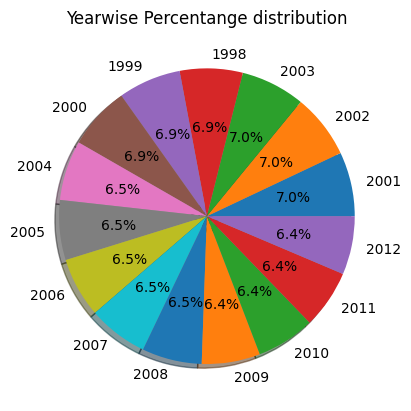

In [10]:
a=df['year'].value_counts()
data=a.values
labels=a.index
plt.pie(x=data,labels=labels,autopct='%0.1f%%',shadow=True)
plt.title('Yearwise Percentange distribution')
plt.show()

**Observation**: The above piechart shows yearwise distribution of honey in percentenges. And it is noted that the distribution of honey across different states in America over the years are of same percentange.

**4) Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.**

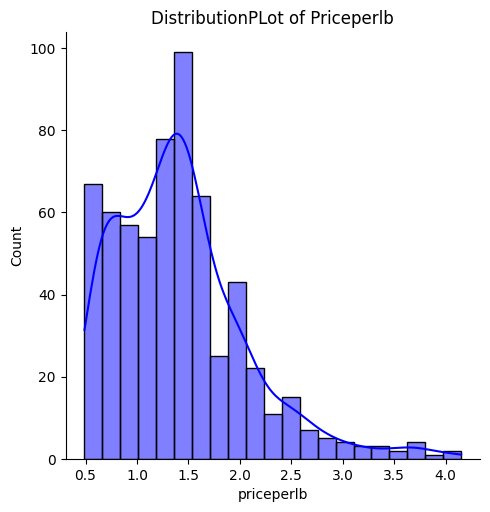

In [11]:
sns.displot(data=df,x='priceperlb',kde=True,color='blue')
plt.title("DistributionPLot of Priceperlb")
plt.show()

**Observation**:From the distribution plot of 'priceperlb' it is observed that, over the years the average price per pound of honey is around 1.5 dollars among most of the states.

**5) Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and
write your findings.**

In [12]:
df['numcol'].corr(df['prodvalue'])

0.9127962488930383

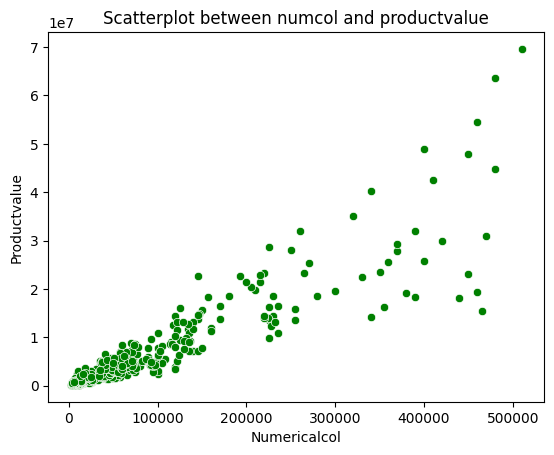

In [13]:
sns.scatterplot(data=df,x='numcol',y='prodvalue',color='green')
plt.title('Scatterplot between numcol and productvalue')
plt.xlabel('Numericalcol')
plt.ylabel("Productvalue")
plt.show()

**Observation**:The above scatterplot shows relationship between Numercalcol-Number of honey producing colonies as X-axis and ProductValue-Value of production (total prod x priceperlb) as y-axis. Unit is dollars.
The scatterplot is likely to show a clear upward trend, indicating that as the number of honey-producing colonies increases, the value of production also tends to increase. This suggests a positive correlation, which aligns with the correlation coefficient of 0.91.

**6) Plot and understand the relationship between categorical variable 'year' and a numerical variable
'prodvalue' through boxplot, and write your findings**

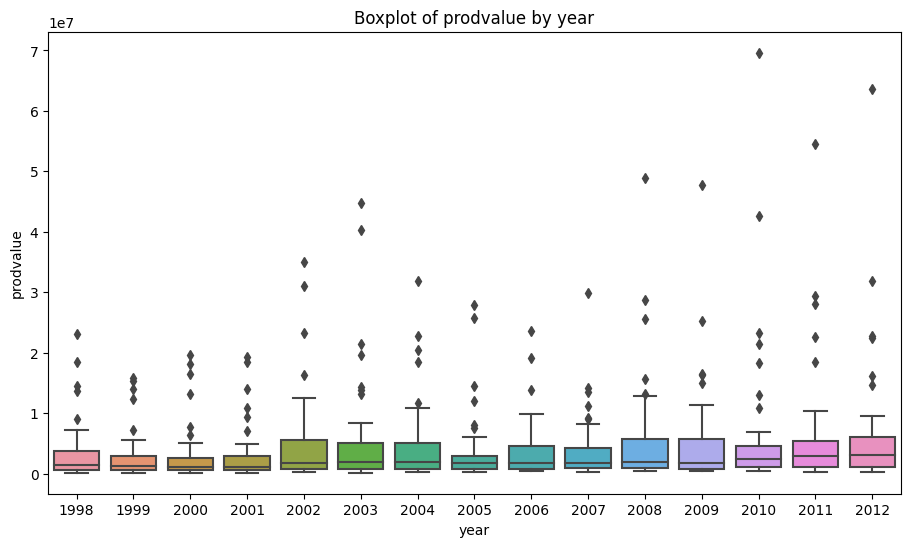

In [14]:
plt.figure(figsize=(11,6))
sns.boxplot(data=df,x='year', y='prodvalue')
plt.title('Boxplot of prodvalue by year')
plt.show()

**Observation**:The boxplot of 'prodvalue'-Value of production (total prod x priceperlb) over the years shows there has been a lot of outliers present in the data. And it is noted to work with outliers before building a model.

**7) Visualize and understand the relationship between the multiple pairs of variables throughout different years
using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')**

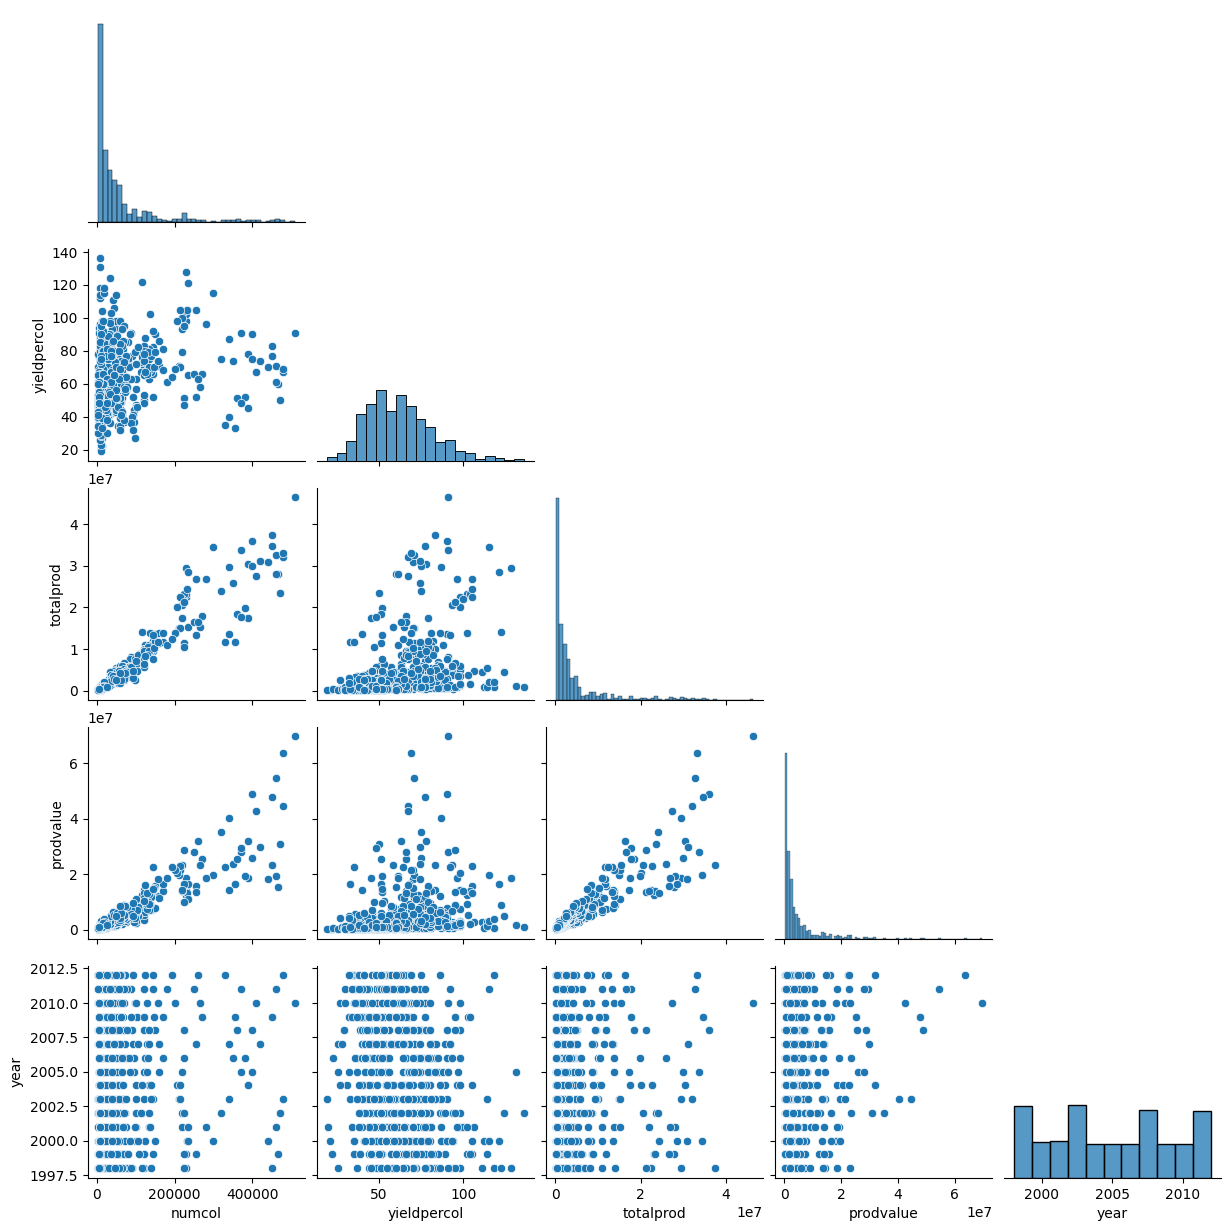

In [18]:
sns.pairplot(data=df,vars=['numcol', 'yieldpercol', 'totalprod', 'prodvalue','year'],corner=True)
plt.show()

**Observations**:The above pairplot shows distribution of variables 'numcol', 'yieldpercol', 'totalprod', 'prodvalue','year'.
1)There has been positive linear relationship between 'totalprod' and 'prodvalue' and also for 'numcol' and 'prodvalue'.
2)The histogram of 'numcol' suggests that there is large count for number of colonies less than 50000.
3)The histogram of year shows there has been increase in distribution every half in 5 years.
4)The scatterplot between 'yieldpercol' and 'prodvalue'suggests that the prodvalue for many number of yield per colonies is around 1 to 2 dollars.

**8) Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol',
'total prod', 'stocks', 'price per lb', 'prodvalue')**

In [19]:
correlation=df.corr(numeric_only=True)
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796,0.008709
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977,-0.232092
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236,-0.055556
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560,-0.119602
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567,0.693984
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000,0.139451
year,0.008709,-0.232092,-0.055556,-0.119602,0.693984,0.139451,1.000000


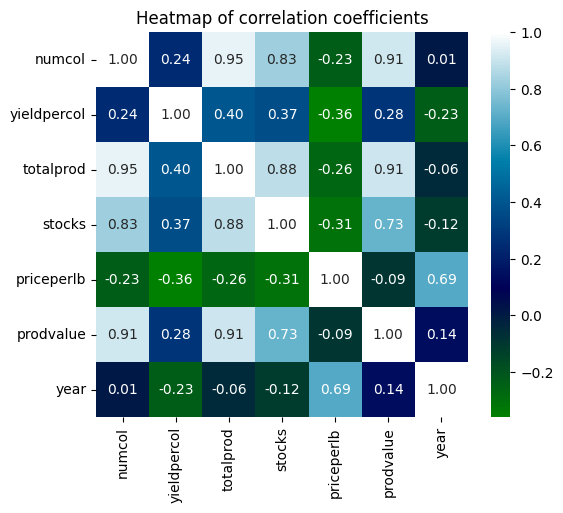

In [20]:
plt.figure(figsize=(6,5))
sns.heatmap(data=df.corr(numeric_only=True),annot=True,cmap='ocean',cbar=True,fmt='0.2f')
plt.title("Heatmap of correlation coefficients")
plt.show()

**Observation**:The heatmap shows the correlation between all the numerical values of the Honey_production data. And it has been noted that there is a high positive correlation between 'numcol' and 'prodvalue' which is 0.91. And the next high positive correlation is between variables 'totalprod' and 'stocks' which is 0.88. And there is a high negative correlation between variables 'yieldpercol' and'priceperlb' which is -0.36.